## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [1]:
import math

def sign(x):
    return math.copysign(1,x)

In [2]:
def bisezione(fname, a, b, tol):

    fa = fname(a)
    fb = fname(b)

    if sign(fa)*sign(fb) >=0:
        print("bisection not applicable!")
        return None

    it=0
    v_xk=[]
    maxit=math.ceil(math.log2((b-a)/tol)) - 1

    while abs(b-a) > tol:
        xk=a+(b-a)/2
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)

        # xk is zero
        if fxk == 0:
            return xk,it,v_xk

        # zero in [xk,b]
        if sign(fa)*sign(fxk) > 0: 
            a=xk
            fa=fxk

        # zero in [a,xk]
        elif sign(fxk)*sign(fb) > 0:
            b=xk
            fb=fxk

    return xk, it, v_xk 

bisection zero is:  -2.2737367544323206e-13


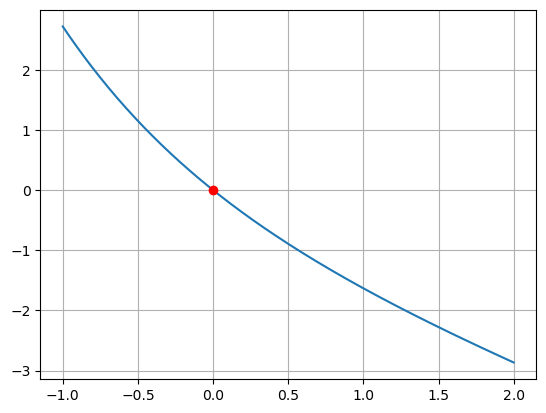

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f1= lambda x: np.exp(-x)-(x+1)
a=-1.0
b=2.0
xx=np.linspace(a,b,200)

plt.plot(xx, f1(xx))
plt.grid(True)

tol=1e-12
zero_b,it_b,v_xk_b=bisezione(f1,a,b,tol)
print('bisection zero is: ', zero_b)

plt.plot(zero_b,f1(zero_b),'ro')
plt.show()

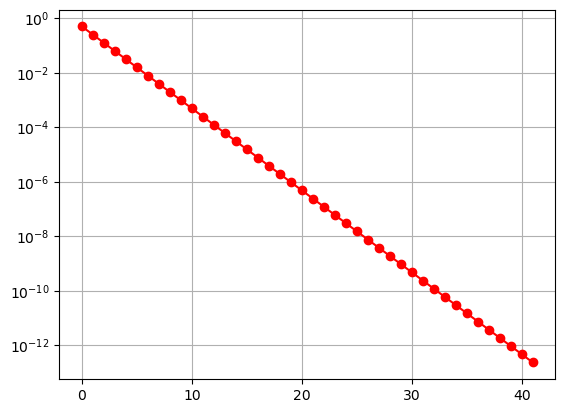

[5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11 1.45519152e-11
 7.27595761e-12 3.63797881e-12 1.81898940e-12 9.09494702e-13
 4.54747351e-13 2.27373675e-13]


In [4]:
v_xk_b=np.array(v_xk_b)
alfa=0
err_b=np.abs(v_xk_b-alfa)
plt.grid(True)
plt.semilogy(range(it_b),err_b,'-ro')
plt.show()

print(err_b)

In [5]:
def falsa_posizione(fname, a, b, tol, tolf,maxit=1000):
    fa = fname(a)
    fb = fname(b)

    if sign(fa)*sign(fb) >=0:
        print("falsa_posizione not applicable!")
        return None

    it=0
    v_xk=[]
    fxk = tolf+1

    while abs(b-a) > tol and it < maxit and abs(fxk)>tolf:
        xk=a-fa*(b-a)/(fb-fa)
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)

        # xk is zero
        if fxk == 0:
            return xk,it,v_xk

        # zero in [xk,b]
        if sign(fa)*sign(fxk) > 0: 
            a=xk
            fa=fxk

        # zero in [a,xk]
        elif sign(fxk)*sign(fb) > 0:
            b=xk
            fb=fxk

    return xk, it, v_xk 

falsa_posizione zero is:  3.2573943542502093e-13


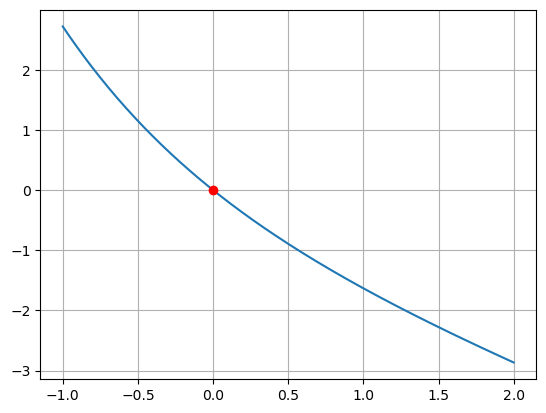

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f1= lambda x: np.exp(-x)-(x+1)
a=-1.0
b=2.0
xx=np.linspace(a,b,200)

plt.plot(xx, f1(xx))
plt.grid(True)

tol=1e-12
tolf=1e-12
zero_f,it_f,v_xk_f=falsa_posizione(f1,a,b,tol,tolf)
print('falsa_posizione zero is: ', zero_f)

plt.plot(zero_f,f1(zero_f),'ro')
plt.show()

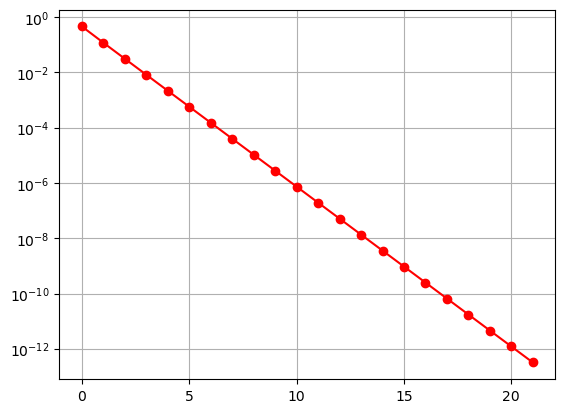

[5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11 1.45519152e-11
 7.27595761e-12 3.63797881e-12 1.81898940e-12 9.09494702e-13
 4.54747351e-13 2.27373675e-13]


In [7]:
v_xk_f=np.array(v_xk_f)
alfa=0
err_f=np.abs(v_xk_f-alfa)
plt.grid(True)
plt.semilogy(range(it_f),err_f,'-ro')
plt.show()

print(err_b)

In [63]:
import sympy as sym
from sympy.utilities.lambdify import lambdify

x=sym.symbols('x')
fs=sym.exp(-x)-(x+1)
dfs=sym.diff(fs,x,1)

fp=lambdify(x,dfs,np)
f=lambdify(x,fs,np)

In [89]:
def newton(fname,fpname,x0,tolx,tolf,maxit=500):
    xk=[]
    fx0=fname(x0)
    d=fx0/fpname(x0)
    x1=x0-d
    fx1=fname(x1)
    xk.append(x1)

    it=1

    while it<maxit and abs(fx1)>tolf and abs(d)>tolx*abs(x1):
        x0=x1
        fx0=fname(x0)
        d=fx0/fpname(x0)
        x1=x0-d
        fx1=fname(x1)
        it+=1
        xk.append(x1)

    if it>=maxit:
        print('reached max iterations')

    return x1,it,xk

newton zero is:  -6.242314416285365e-15


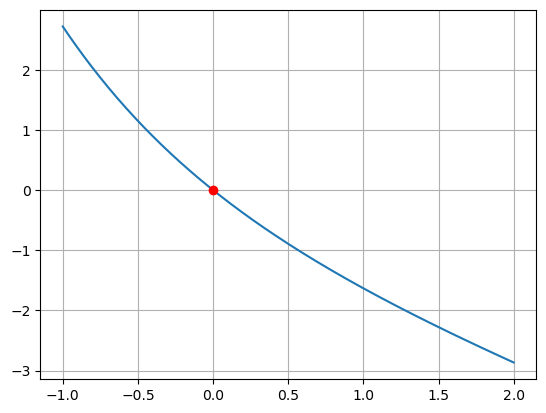

In [90]:
import numpy as np
import matplotlib.pyplot as plt

f1= lambda x: np.exp(-x)-(x+1)
a=-1.0
b=2.0
xx=np.linspace(a,b,200)

plt.plot(xx, f1(xx))
plt.grid(True)

tolx=1e-12
tolf=1e-12
x0=0.5
zero_n,it_n,v_xk_n=newton(f1,fp,x0,tolx,tolf)
print('newton zero is: ', zero_n)

plt.plot(zero_n,f1(zero_n),'ro')
plt.show()

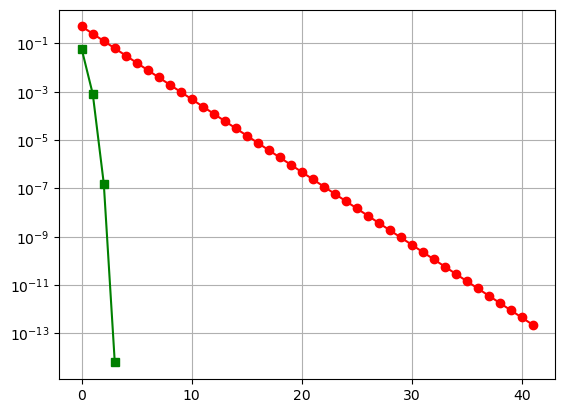

[5.61483280e-02 7.95324993e-04 1.58156414e-07 6.24231442e-15]


In [95]:
v_xk_n=np.array(v_xk_n)
alfa=0
err_n=np.abs(v_xk_n-alfa)
plt.grid(True)
plt.semilogy(range(it_b),err_b,'-ro')
plt.semilogy(range(it_n),err_n,'-gs')
plt.show()

print(err_n)

**Sperimentazione numerica**

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

- Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

- Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

- Utilizzare il metodo di Newton per determinare le radici dell’equazione f (x) = 
rcatan(x) con x0 = 1.2, 1.4 assumendo tolx = 1.e − 6 e tolf = 1.e − 5. Che cos a
si osserva?

**Soluzione di sistemi non lineari**


- Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


**Sperimentazione Numerica**

Risolvere i seguenti tre sistemi non lineari:

1) 

   2x0-cos(x1)=0

   sin(x0)+2x1=0

2) 

   x0^2+x1^2-9=0

   x0+x1-3=0

3) 

   4x0^2+x_1^2=4

   x0+x1=sin(x0-x1)



Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$  nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici z1 = f1 (x0 ,x1 ) e z2 = f2(x0, x1 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 